 # <h1><center><u> **Capstone Project 2024-25**</u></center></h1> #

###### <h1><center><u> Small Business Administration Loan Process</u> </center></h1> ######

In [1]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv('SBAnational.csv')
data.head(5)

<IPython.core.display.Javascript object>

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### Breakdown of the columns and what they represent<br>
**LoanNr_ChkDgt**: Loan number with a check digit.<br>
<br>
**Name**: Name of the borrower.<br>
<br>
**City**: City where the borrower is located.<br>
<br>
**State**: State where the borrower is located.<br>
<br>
**Zip**: Zip code of the borrower's location.<br>
<br>
**Bank**: Bank that issued the loan.<br>
<br>
**BankState**: State where the bank is located.<br>
<br>
**NAICS**: North American Industry Classification System code for the borrower's industry.<br>
<br>
**ApprovalDate**: Date the loan was approved.<br>
<br>
**ApprovalFY**: Fiscal year the loan was approved.<br>
<br>
**Term**: Loan term in months.<br>
<br>
**NoEmp**: Number of employees.<br>
<br>
**NewExist**: Whether the business is new (1) or existing (2).<br>
<br>
**CreateJob**: Number of jobs created with the loan.<br>
<br>
**RetainedJob**: Number of jobs retained with the loan.<br>
<br>
**FranchiseCode**: Whether the business is a franchise (1) or not (0).<br>
<br>
**UrbanRural**: Whether the location is urban (1) or rural (0).<br>
<br>
**RevLineCr**: Whether the loan is a revolving line of credit (Y) or not (N).<br>
<br>
**LowDoc**: Whether the loan is a low documentation loan (Y) or not (N).<br>
<br>
**ChgOffDate**: Date the loan was charged off, if applicable.<br>
<br>
**DisbursementDate**: Date the loan was disbursed.<br>
<br>
**DisbursementGross**: Amount disbursed.<br>
<br>
**BalanceGross**: Remaining balance of the loan.<br>
<br>
**MIS_Status**: Loan status (P I F means Paid in Full).<br>
<br>
**ChgOffPrinGr**: Charge-off principal gross amount.<br>
<br>
**GrAppv**: Gross amount approved.<br>
<br>
**SBA_Appv**: SBA-approved amount.<br>
<br>

In [3]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-

### Missing Values Check

In [4]:
missing_values_info = data.isnull().sum()
missing_values_info = missing_values_info[missing_values_info > 0]
missing_values_dict = missing_values_info.to_dict()
missing_values_dict

{'Name': 14,
 'City': 30,
 'State': 14,
 'Bank': 1559,
 'BankState': 1566,
 'NewExist': 136,
 'RevLineCr': 4528,
 'LowDoc': 2582,
 'ChgOffDate': 736465,
 'DisbursementDate': 2368,
 'MIS_Status': 1997}

# Data Cleaning

'GrAppv', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementGross', 'BalanceGross' these columns have values e.g., '25,000$'. In order to do operations on those columns we need clean value like '25000'.

In [5]:
columns_to_remove = ['GrAppv', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementGross', 'BalanceGross']

def clean_column(df, column_name):
    df[column_name] = df[column_name].str.replace('$', '').str.replace(',', '').astype(float)
    return df

def clean_columns(df, columns):
    for column in columns:
        df = clean_column(df, column)
    return df

data = clean_columns(data, columns_to_remove)

Some of 'ApprovalFY' values has values that are inconsistent like '1997A'.

In [6]:
# Function to clean the 'ApprovalFY' column
def clean_year(year):
    if isinstance(year, str):  # Ensure the year is a string
        # Remove non-numeric characters
        cleaned_year = ''.join(filter(str.isdigit, year))
        return int(cleaned_year) if cleaned_year else None
    return year  # Return the year as is if it's already an integer

# Apply the cleaning function to the 'ApprovalFY' column
data['ApprovalFY'] = data['ApprovalFY'].apply(clean_year)

There are inconsistensies in date format.

In [7]:
# Check consistency of date formats
date_columns = ['ApprovalDate','ChgOffDate', 'DisbursementDate']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Function for validity of NAICS code

In [8]:
def validate_naics(data, column='NAICS'):

    # Convert to string and check if it follows the 6-digit format
    is_valid_naics = data[column].astype(str).str.match(r'^\d{6}$')

    # Count valid and invalid NAICS codes
    valid_count = is_valid_naics.sum()
    invalid_count = (~is_valid_naics).sum()

    # Get sample of invalid NAICS values
    invalid_entries = data.loc[~is_valid_naics, [column]].head()

    return {
        "valid_count": valid_count,
        "invalid_count": invalid_count,
        "invalid_samples": invalid_entries
    }

result = validate_naics(data)
result

{'valid_count': 697216,
 'invalid_count': 201948,
 'invalid_samples':     NAICS
 3       0
 4       0
 6       0
 9       0
 13      0}

**Function to count rows where the NAICS code starts with '53' (Real Estate and Rental and Leasing industry).**

In [9]:
def count_naics_53(data, column='NAICS'):
    return data[column].astype(str).str.startswith('53').sum()

total_naics_53 = count_naics_53(data)
print(f"Total rows with NAICS code starting with '53': {total_naics_53}")

Total rows with NAICS code starting with '53': 13632


**Portion:** This variable represents the percentage of a loan guaranteed by the SBA. It is calculated as the ratio of the amount of the loan SBA guarantees to the gross amount approved by the bank (SBA_Appv/GrAppv). The "Portion" variable helps in assessing risk because loans that are paid in full tend to have a slightly higher SBA-guaranteed percentage.<br>
In the dataset, the median for defaulted loans is 0.5, which means that half of the loan amount is guaranteed by the SBA for 54% of defaulted loans

**RealEstate:** This is a dummy variable that indicates whether a loan is backed by real estate. A value of 1 means the loan is backed by real estate, and a value of 0 means it is not. The rationale behind using this variable is that real estate value is often enough to cover any outstanding principal, thus reducing the probability of default<br>* 
Loans backed by Real Estate typically have terms of 20 years or greater, while loans not backed by Real Estate have terms less than 20 years.<br>* 
Loans backed by Real Estate have a significantly lower default rate compared to loans not backed by Real Estate.
.
6%)

In [10]:
# 2. 'Portion' variable
data['Portion'] = data['SBA_Appv'] / data['GrAppv']

# 3. 'RealEstate' variable
data['RealEstate'] = data['Term'].apply(lambda x: 1 if x >= 240 else 0)

### Data from last 5 years

Lets focus on data from the state of California from last 5 years, to create a more realistic decision making scenario.

In [11]:
total_rows = data[data['State'] == 'CA'].shape[0]
print(total_rows)

130619


In [12]:
filtered_data = data[(data['State'] == 'CA') & (data['ApprovalFY'].between(2010, 2014))]
filtered_data.shape

(4395, 29)

In [13]:
filtered_data.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Portion,RealEstate
380241,3673085002,Dennis Baldwin and Elizabeth B,Indio,CA,92201,UMPQUA BANK,OR,424990,2009-10-01,2010,300,8,1.0,0,8,0,1,N,N,NaT,2009-10-01,1327500.0,0.0,P I F,0.0,1327500.0,1194750.0,0.9,1
380248,3673125001,Sara Hedgpeth-Harris,FRESNO,CA,93727,CALIFORNIA BANK & TRUST,CA,541110,2009-10-01,2010,84,1,1.0,1,1,0,1,Y,N,NaT,2009-10-01,38488.0,0.0,P I F,0.0,20000.0,10000.0,0.5,0
380325,3673665010,SERGIO LUGO,UPLAND,CA,91786,U.S. BANK NATIONAL ASSOCIATION,OH,811121,2009-10-01,2010,48,3,2.0,4,7,0,1,Y,N,2012-12-03,2009-10-01,10000.0,0.0,CHGOFF,9262.0,10000.0,9000.0,0.9,0
380330,3673695008,"HANSUNG HEALTHCARE MANAGEMENT,",LOS ANGELES,CA,90057,BBCN BANK,CA,621111,2009-10-01,2010,68,6,1.0,1,7,0,1,N,N,2011-03-01,2009-10-01,20000.0,0.0,CHGOFF,19476.0,20000.0,18000.0,0.9,0
380402,3674375008,Kinetic Lighting Inc,Sun valley,CA,91352,SANTA CLARA VALLEY BANK NATL A,CA,532490,2009-10-02,2010,120,36,1.0,4,0,0,1,N,N,NaT,2010-03-01,504000.0,0.0,P I F,0.0,504000.0,453600.0,0.9,0


In [14]:
result = validate_naics(filtered_data)
result

{'valid_count': 4395,
 'invalid_count': 0,
 'invalid_samples': Empty DataFrame
 Columns: [NAICS]
 Index: []}

In [15]:
total_naics_53 = count_naics_53(filtered_data)
print(f"Total rows with NAICS code starting with '53': {total_naics_53}")

Total rows with NAICS code starting with '53': 87


Data entries with NAICS code starting with '53' seems quiet low, so lets drop this criteria

**RevLineCr:** This variable indicates whether the loan is a revolving line of credit. It is a text field with "Y" denoting "Yes" and "N" denoting "No". This variable could be relevant because a revolving line of credit might suggest a different risk profile than a standard loan. 

**LowDoc:** This variable indicates whether the loan was processed under the "LowDoc Loan" program, which was implemented to process loans under $150,000 more efficiently using a one-page application. "Y" denotes "Yes" (one-page application), and "N" denotes "No" (more information attached to the application)

To make sure that these both columns have consistent values, let's put a filter to clean them.

In [16]:
# Function to filter values that are not 'Y' or 'N'
def filter_yn(value):
    if value not in ['Y', 'N']:
        return np.nan
    return value

# Apply the function to the 'RevLineCr' and 'LowDoc' columns
filtered_data['RevLineCr'] = filtered_data['RevLineCr'].apply(filter_yn)
filtered_data['LowDoc'] = filtered_data['LowDoc'].apply(filter_yn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Missing Values check

In [17]:
missing_values_info = filtered_data.isnull().sum()
missing_values_info = missing_values_info[missing_values_info > 0]
missing_values_dict = missing_values_info.to_dict()
missing_values_dict

{'NewExist': 11,
 'RevLineCr': 138,
 'LowDoc': 84,
 'ChgOffDate': 3881,
 'DisbursementDate': 69,
 'MIS_Status': 5}

### Remove unnecessary categorical columns

The columns 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', and 'FranchiseCode' can be considered for removal because they are not directly used as explanatory variables.

In [18]:
filtered_data = filtered_data.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'FranchiseCode'])

In [19]:
filtered_data['LowDoc'].value_counts()

LowDoc
N    4311
Name: count, dtype: int64

In [20]:
filtered_data['BalanceGross'].value_counts()

BalanceGross
0.0    4395
Name: count, dtype: int64

Since LowDoc has values only of N and BalanceGross has 0.0, we might as well drop it with its criteria of classification.

In [21]:
filtered_data = filtered_data.drop(columns=['LowDoc', 'BalanceGross'])

### replacing NaN values with the mode

In [22]:
columns_to_check = ['NewExist', 'RevLineCr', 'MIS_Status']

# Fill missing values with the mode (most frequent value) for each categorical column
for col in columns_to_check:
    filtered_data[col] = filtered_data[col].fillna(filtered_data[col].mode()[0])

# Verify that there are no more NaN values in these columns
print(filtered_data[columns_to_check].isnull().sum())

NewExist      0
RevLineCr     0
MIS_Status    0
dtype: int64


In [23]:
filtered_data.shape

(4395, 18)

In [24]:
df_clean = filtered_data.copy()

### dropping date columns

In [25]:
df_clean = df_clean.drop(columns=['DisbursementDate', 'ChgOffDate', 'ApprovalDate', 'ApprovalFY'])

In [26]:
df_clean['MIS_Status'].value_counts()

MIS_Status
P I F     3888
CHGOFF     507
Name: count, dtype: int64

In [27]:
df_clean.head(5)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Portion,RealEstate
380241,300,8,1.0,0,8,1,N,1327500.0,P I F,0.0,1327500.0,1194750.0,0.9,1
380248,84,1,1.0,1,1,1,Y,38488.0,P I F,0.0,20000.0,10000.0,0.5,0
380325,48,3,2.0,4,7,1,Y,10000.0,CHGOFF,9262.0,10000.0,9000.0,0.9,0
380330,68,6,1.0,1,7,1,N,20000.0,CHGOFF,19476.0,20000.0,18000.0,0.9,0
380402,120,36,1.0,4,0,1,N,504000.0,P I F,0.0,504000.0,453600.0,0.9,0


### classification as categorical and numerical columns

In [28]:
categorical_features = ['RevLineCr', 'MIS_Status', 'UrbanRural', 'NewExist', 'RealEstate']

In [29]:
numerical_features = ['Term', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr', 'DisbursementGross', 'NoEmp', 'CreateJob', 'RetainedJob', 'Portion']

In [30]:
categorical_cols = df_clean[categorical_features]
categorical_cols.head(5)

,RevLineCr,MIS_Status,UrbanRural,NewExist,RealEstate
380241,N,P I F,1,1.0,1
380248,Y,P I F,1,1.0,0
380325,Y,CHGOFF,1,2.0,0
380330,N,CHGOFF,1,1.0,0
380402,N,P I F,1,1.0,0


In [31]:
numerical_cols = df_clean[numerical_features]
numerical_cols.head(5)

,Term,GrAppv,SBA_Appv,ChgOffPrinGr,DisbursementGross,NoEmp,CreateJob,RetainedJob,Portion
380241,300,1327500.0,1194750.0,0.0,1327500.0,8,0,8,0.9
380248,84,20000.0,10000.0,0.0,38488.0,1,1,1,0.5
380325,48,10000.0,9000.0,9262.0,10000.0,3,4,7,0.9
380330,68,20000.0,18000.0,19476.0,20000.0,6,1,7,0.9
380402,120,504000.0,453600.0,0.0,504000.0,36,4,0,0.9


### summary of statistical measures

In [32]:
numerical_cols.describe()

,Term,GrAppv,SBA_Appv,ChgOffPrinGr,DisbursementGross,NoEmp,CreateJob,RetainedJob,Portion
count,4395.000000,4.395000e+03,4.395000e+03,4.395000e+03,4.395000e+03,4395.000000,4395.000000,4395.000000,4395.000000
mean,116.827304,3.803756e+05,3.111175e+05,5.675768e+03,4.022280e+05,13.824118,3.253470,10.542435,0.706568
std,83.239904,6.067300e+05,5.272368e+05,4.102069e+04,6.122653e+05,31.204062,9.006744,20.854454,0.190355
min,1.000000,1.000000e+03,5.000000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.290000
25%,84.000000,3.500000e+04,2.125000e+04,0.000000e+00,4.428750e+04,2.000000,0.000000,1.000000,0.500000
50%,84.000000,1.460000e+05,9.000000e+04,0.000000e+00,1.500000e+05,5.000000,1.000000,4.000000,0.750000
75%,120.000000,4.600000e+05,3.750000e+05,0.000000e+00,5.000000e+05,14.000000,3.000000,10.000000,0.900000
max,312.000000,5.000000e+06,5.000000e+06,1.053543e+06,5.000000e+06,604.000000,171.000000,356.000000,1.000000


# Exploratory Data Analysis

RevLineCr:
 RevLineCr
N    2840
Y    1555
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

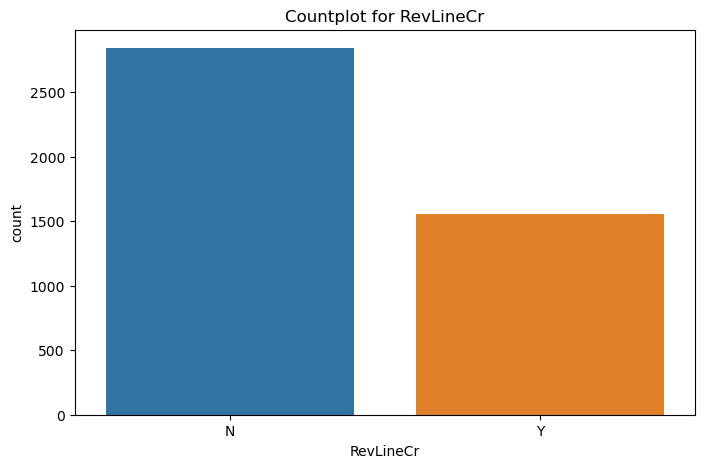

<IPython.core.display.Javascript object>

MIS_Status:
 MIS_Status
P I F     3888
CHGOFF     507
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

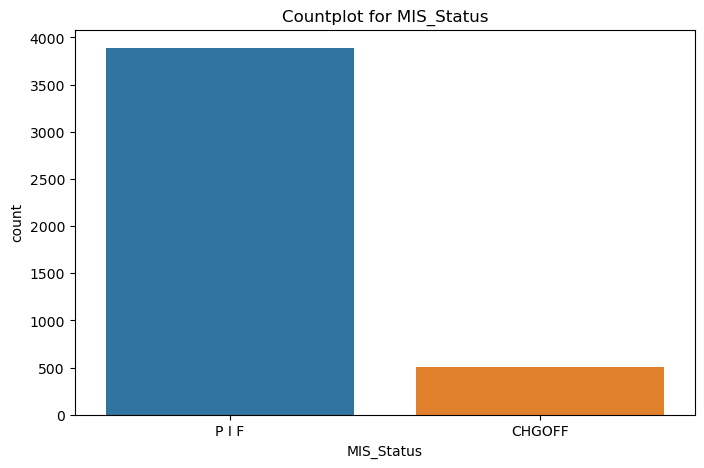

<IPython.core.display.Javascript object>

UrbanRural:
 UrbanRural
1    4112
2     283
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

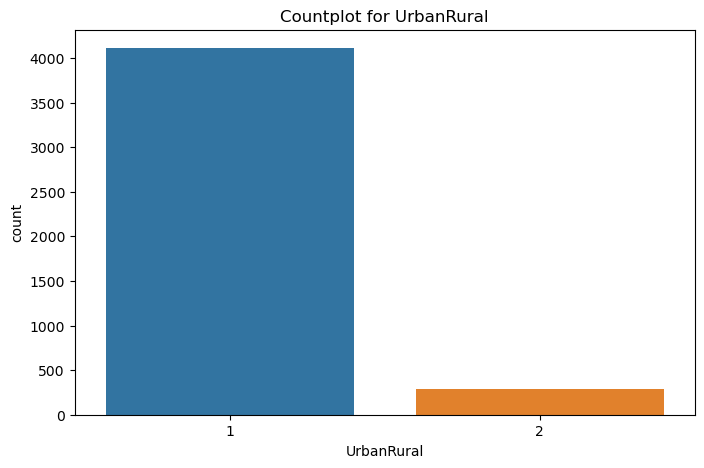

<IPython.core.display.Javascript object>

NewExist:
 NewExist
1.0    3492
2.0     903
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

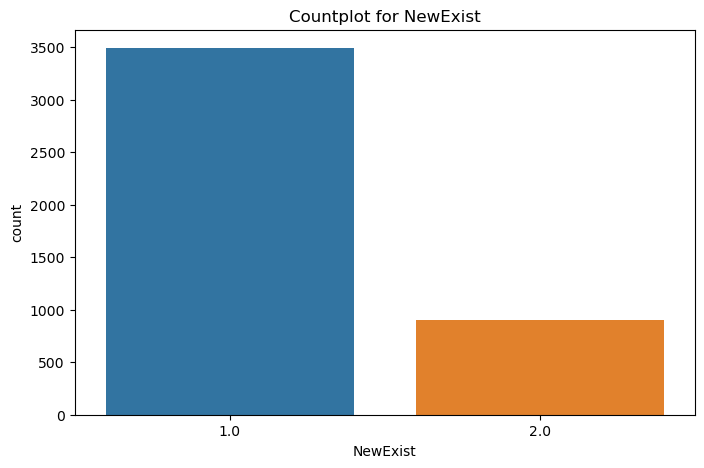

<IPython.core.display.Javascript object>

RealEstate:
 RealEstate
0    3603
1     792
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

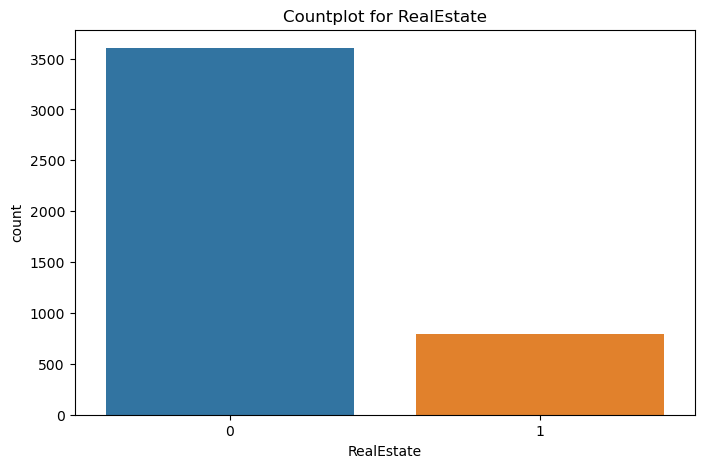

<IPython.core.display.Javascript object>

In [33]:
# Categorical EDA
for feature in categorical_features:
    print(f"{feature}:\n", df_clean[feature].value_counts())

    plt.figure(figsize=(8, 5))  # Set figure size
    sns.countplot(x=feature, data=df_clean)
    plt.title(f"Countplot for {feature}")

    # Save plot as an image
    # plt.savefig(f"{feature}_countplot.png", dpi=300, bbox_inches='tight')

    plt.show()  
    plt.close()  

In all plots, one category has a significantly higher count than the other, indicating an imbalance in the distribution of these categorical variables.<br>

For "NewExist", "RealEstate", and "MIS_Status", the first category (1.0, 0, and PIF, respectively) is much more frequent than the second category.<br>

For "RevLineCr", the category N is more frequent than Y, but the difference is less pronounced compared to the other variables.<br>

Urban category having a much higher count compared to the Rural category.
es.
s.

## Boxplots for Outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

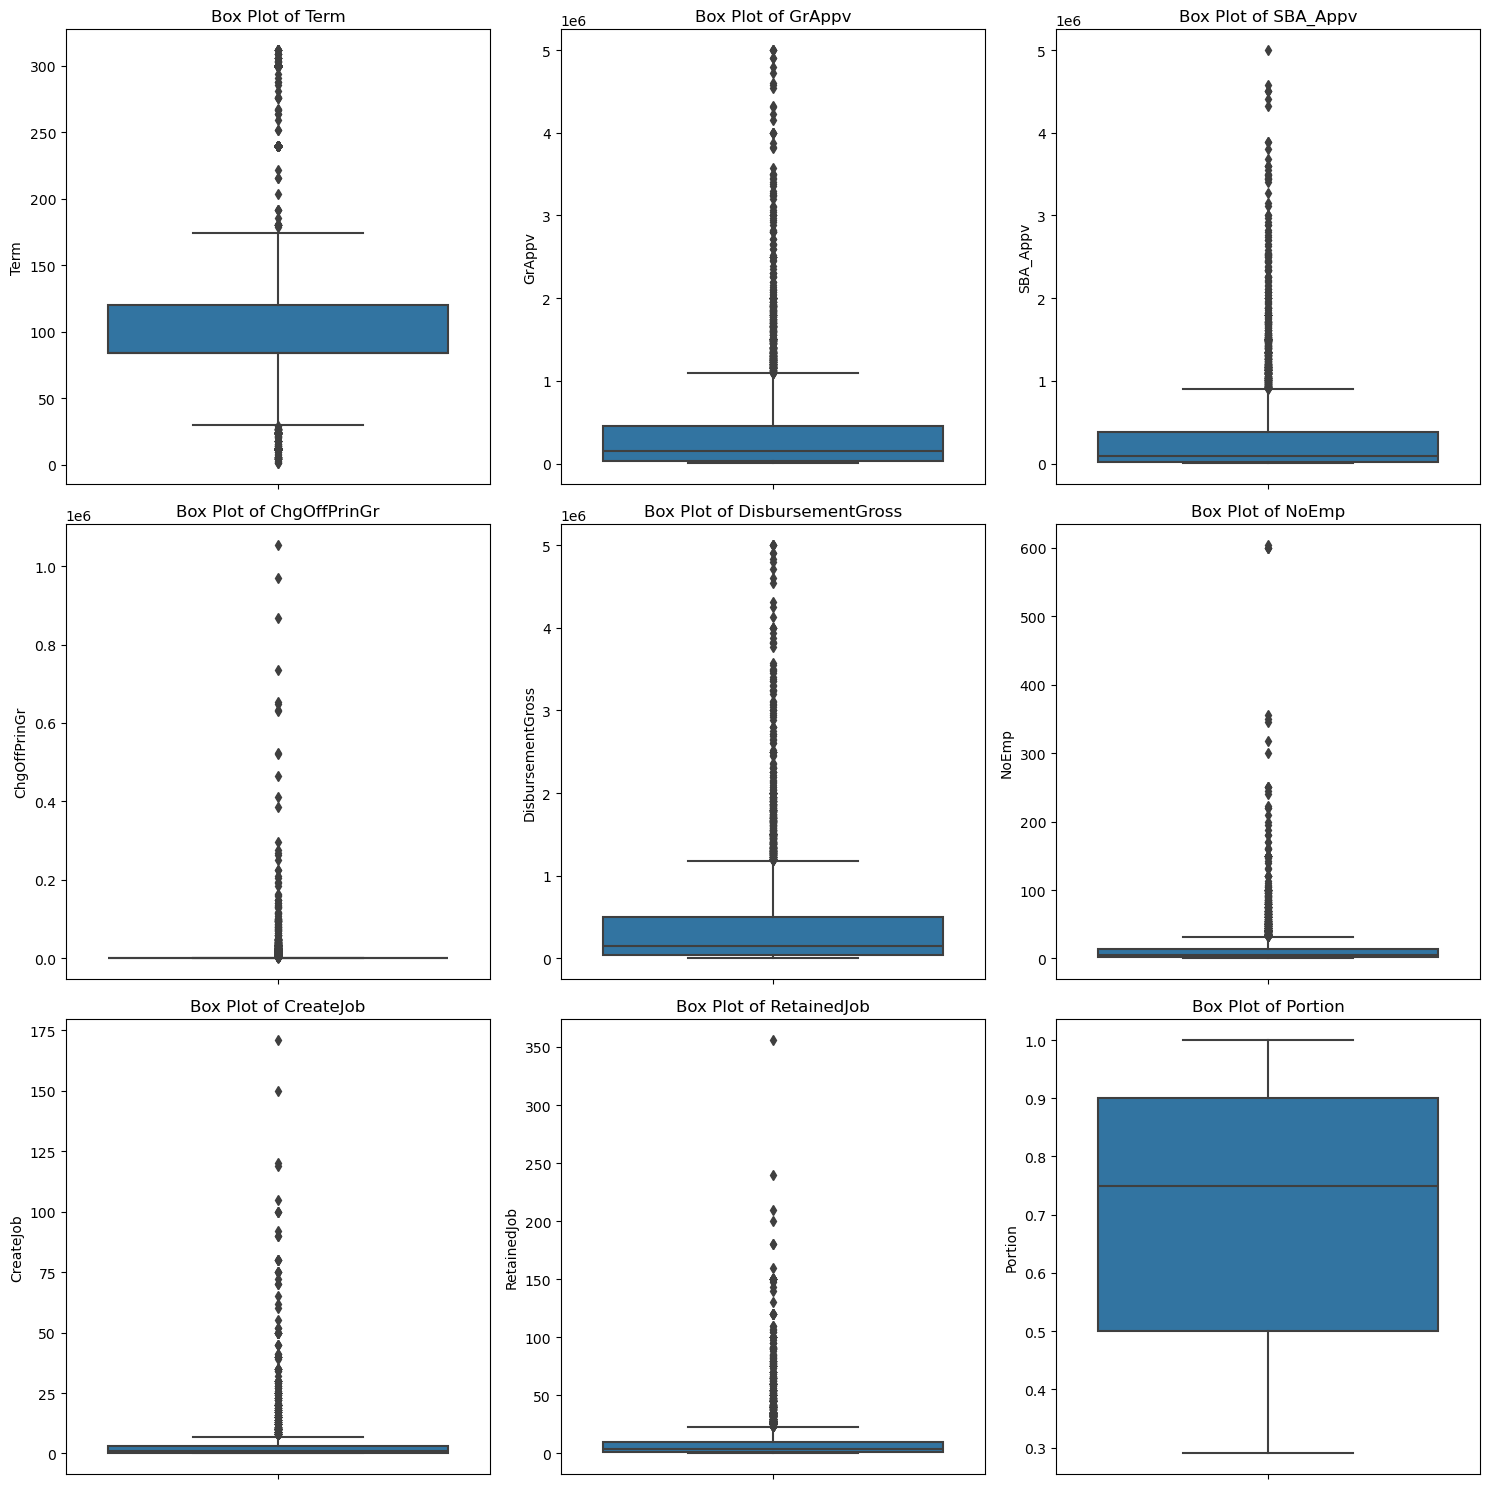

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    if i < 9:  # Plot only the first 9 features
        sns.boxplot(y=df_clean[feature], ax=axes[i])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_ylabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the entire figure as an image
# plt.savefig(f"boxplots_grid.png", dpi=300, bbox_inches='tight')

plt.show()

Most of the datasets exhibit a highly skewed distribution with a large number of outliers.<br>
The median values for many datasets are close to 0, indicating that a significant portion of the data points are low values.<br>
The presence of numerous outliers suggests that a small number of data points have extremely high values, which could significantly impact the mean and standard deviation of these datasets.<br>
The "Portion" dataset appears to be the most symmetric and has the fewest outliers, indicating a more balanced distribution compared to the others.

## Histograms for Skewness

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

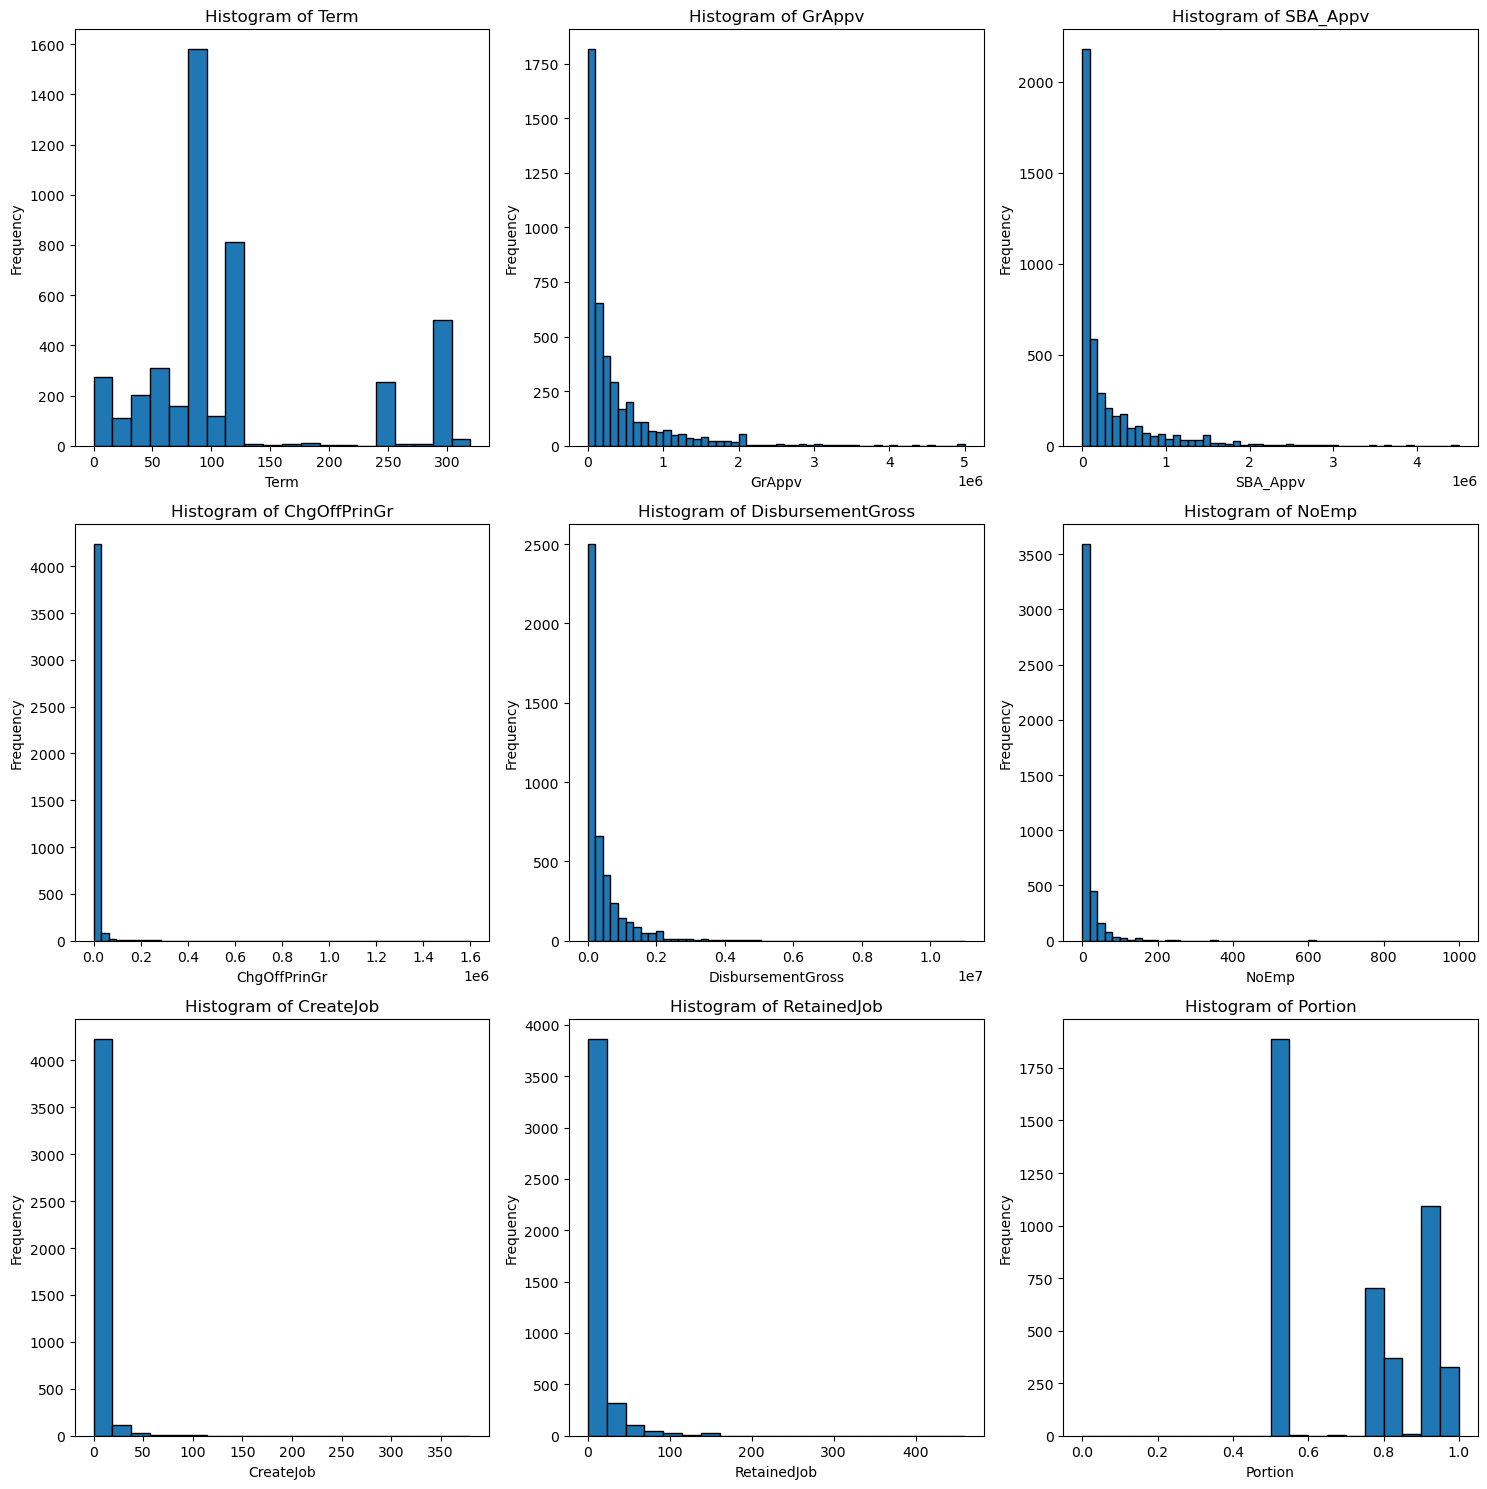

In [35]:
# Custom bin sizes and ranges for each feature
bin_ranges = {
    'Term': (0, 320, 20),
    'GrAppv': (0, 5000000, 50),
    'SBA_Appv': (0, 4500000, 50),
    'ChgOffPrinGr': (0, 1600000, 50),
    'DisbursementGross': (0, 11000000, 50),
    'BalanceGross': (0, 85000, 50),
    'NoEmp': (0, 1000, 50),
    'CreateJob': (0, 380, 20),
    'RetainedJob': (0, 460, 20),
    'Portion': (0, 1, 20)
}

# Create subplots: 3 rows x 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through each numerical feature and plot histogram
for i, feature in enumerate(numerical_features):
    if i < 9:  # Only plot the first 9 features in the 3x3 grid
        axes[i].hist(df_clean[feature], bins=bin_ranges[feature][2], range=bin_ranges[feature][:2], edgecolor='black')
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the entire figure as an image
# plt.savefig(f"histograms_grid.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**Histogram of Term:**
The distribution is multimodal with peaks around 0, 100, and 250.
This suggests that the term lengths are clustered around these values.

**GrAppv:**
Highly right-skewed with most values close to 0.
Indicates that the majority of the data points have low values, with few outliers.

**SBA_Appv:**
Similar to GrAppv, highly right-skewed with most values close to 0.
Suggests a similar distribution pattern with few high values.

**ChgOffPrinGr:**
Most values are close to 0, indicating minimal changes in the principal amount for most data points.

**DisbursementGross:**
Highly right-skewed with most values close to 0.
Indicates that most disbursements are low, with few high disbursements.

**NoEmp:**
Highly right-skewed with most values close to 0.
Suggests that most data points have a low number of employees.

**CreateJob:**
Most values are close to 0, indicating minimal job creation for most data points.

**RetainedJob:**
Highly right-skewed with most values close to 0.
Indicates that most data points have retained a low number of jobs.

**Portion:**
Bimodal distribution with peaks around 0 and 1.
Suggests that the data is clustered around these two values.
ta is clustered around these two values.
lustered around these two values.

 Most variables are right-skewed, indicating that the majority of the data points have low values with few high outliers.

## Bivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

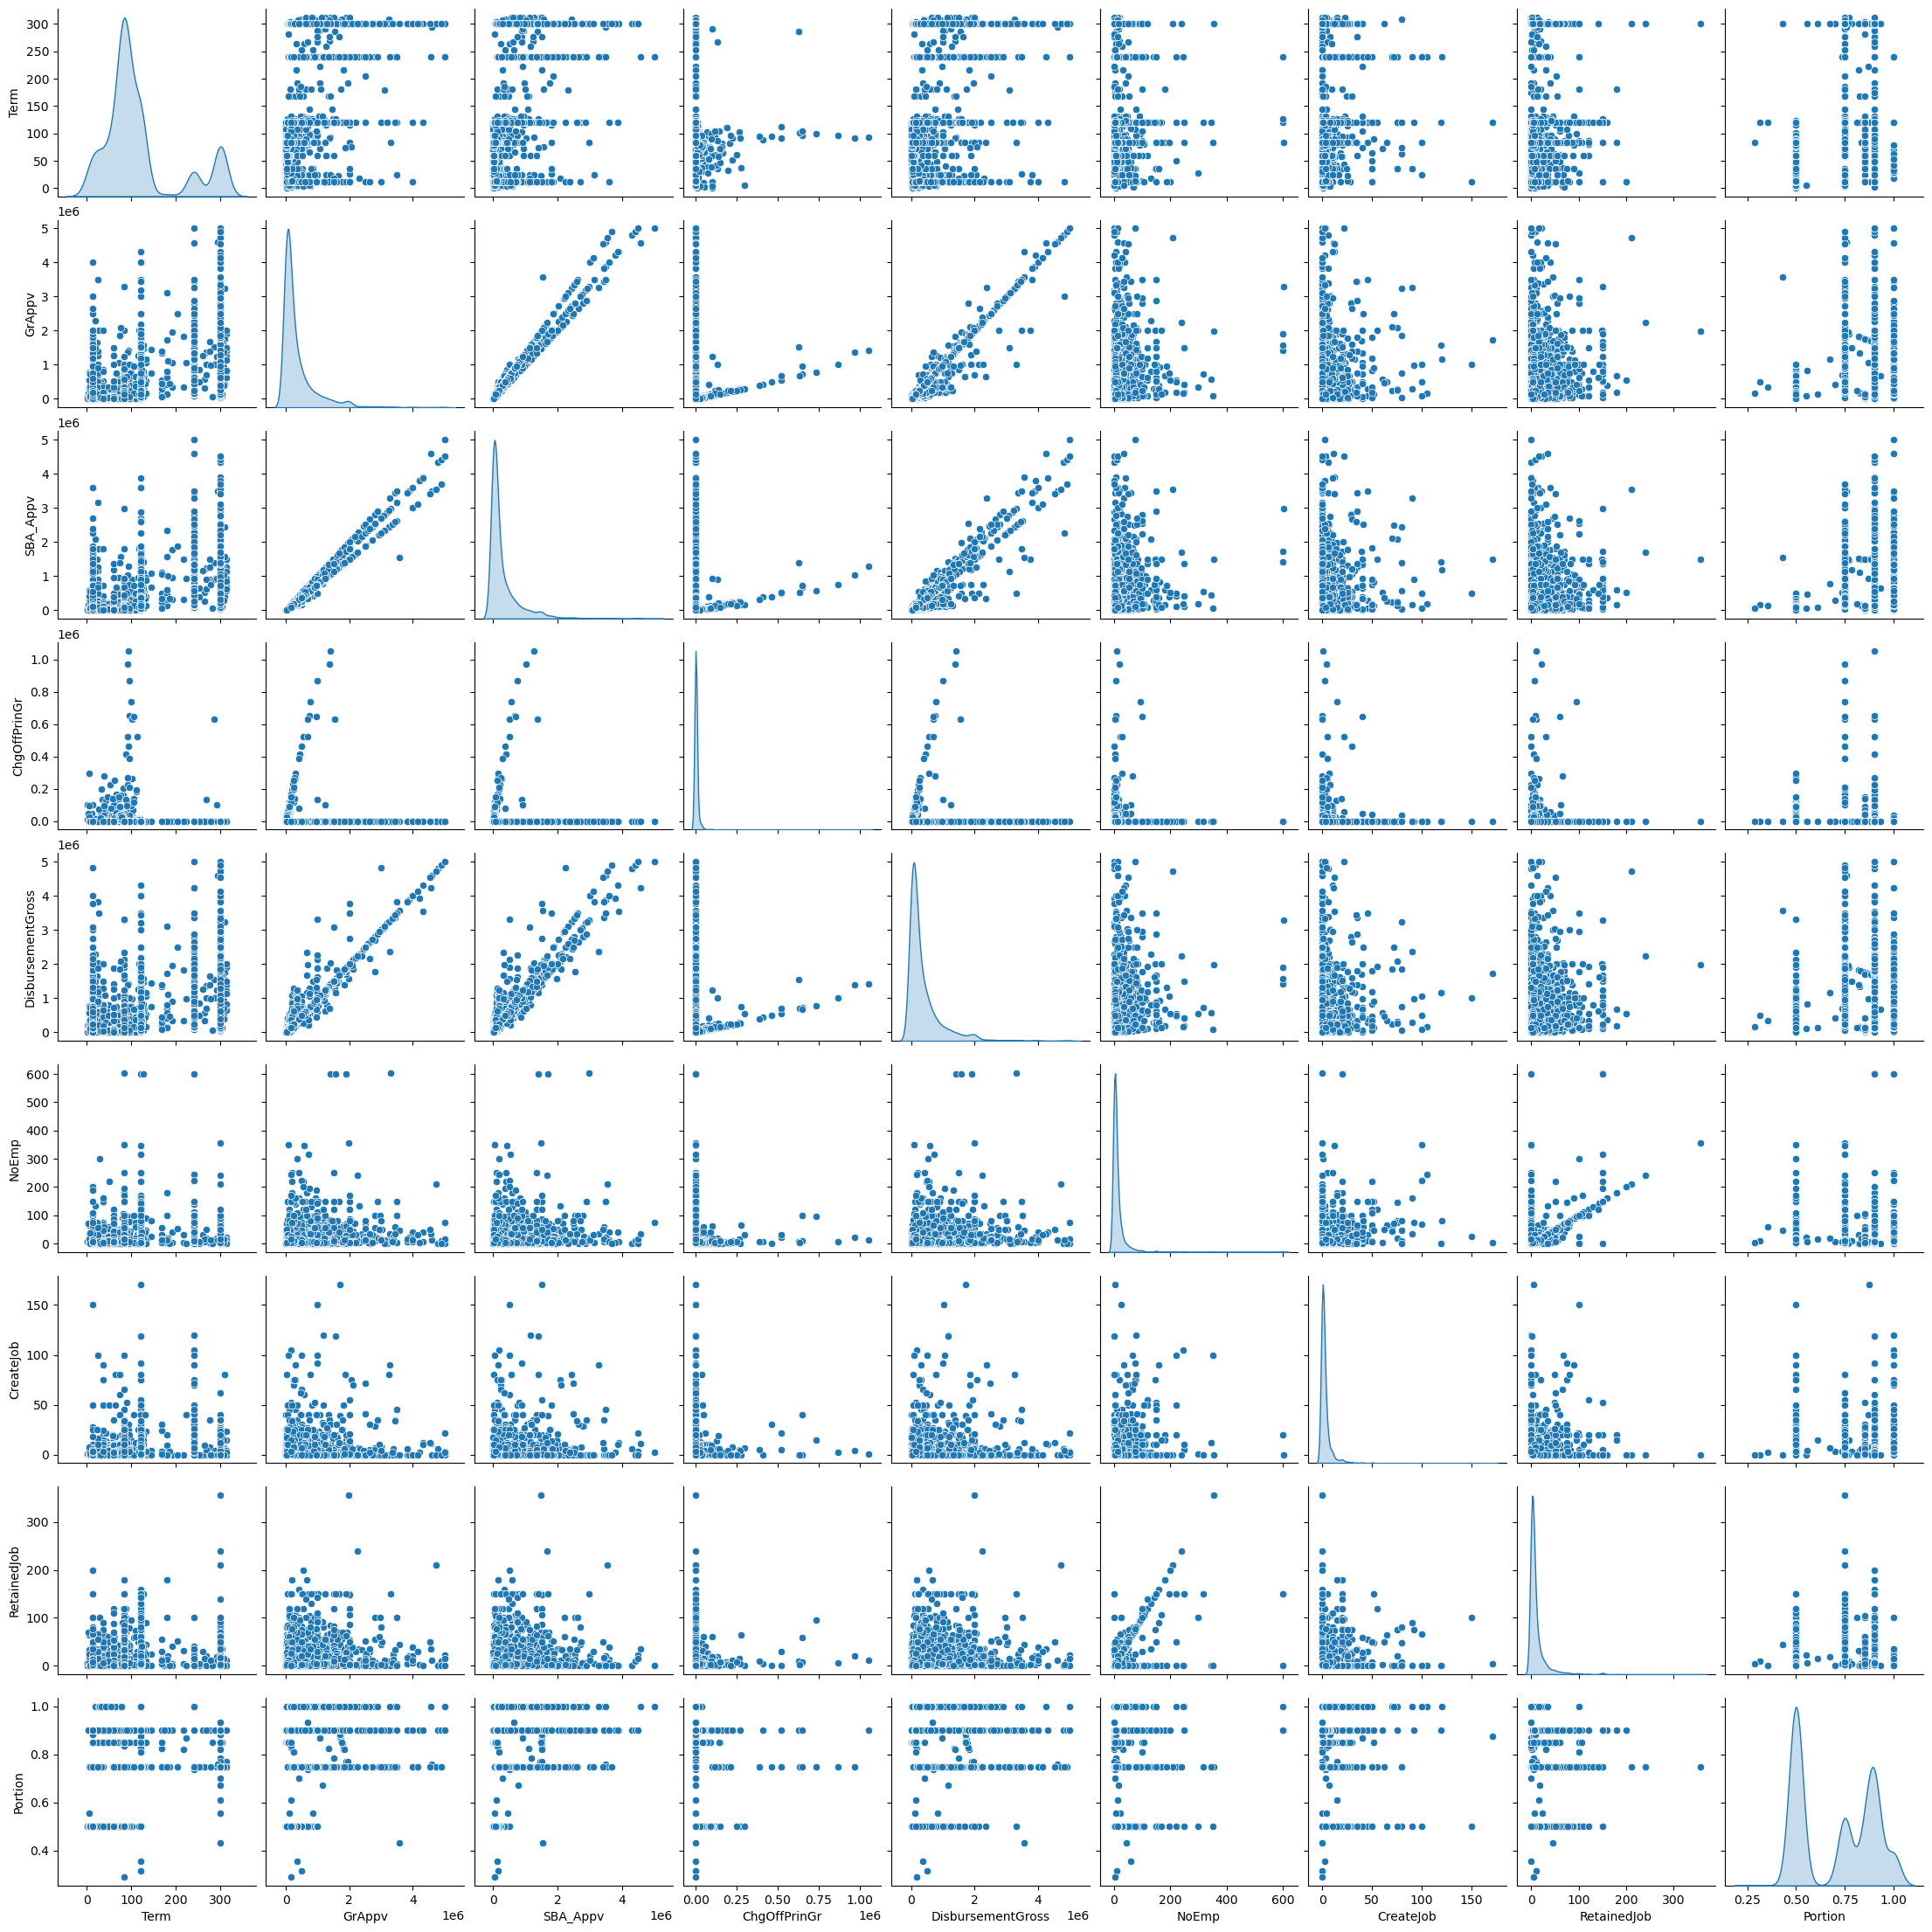

In [36]:
sns.pairplot(data=numerical_cols, diag_kind='kde')
# plt.savefig(f"pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

**Distribution:**

Most variables are right-skewed, indicating that the majority of the data points have low values with few high outliers.<br>
The "Portion" variable is bimodal. <br>

**Relationships:**

Strong positive relationships between GrAppv and SBA_Appv, and between these variables and DisbursementGross. <br>
Moderate positive relationships between Term and Portion, and between Term and GrAppv/SBA_Appv. <br>
Weak positive relationships between NoEmp and CreateJob/RetainedJob.
ob.
br>
Job.

## Pearson Correlation

In [37]:
correlation_matrix = df_clean[numerical_features].corr()
correlation_matrix

,Term,GrAppv,SBA_Appv,ChgOffPrinGr,DisbursementGross,NoEmp,CreateJob,RetainedJob,Portion
Term,1.000000,0.517791,0.529105,-0.058167,0.473991,0.075298,0.076964,0.035796,0.471240
GrAppv,0.517791,1.000000,0.989628,0.003648,0.981074,0.255046,0.153327,0.234042,0.366823
SBA_Appv,0.529105,0.989628,1.000000,0.001653,0.963543,0.252262,0.161719,0.207190,0.420098
ChgOffPrinGr,-0.058167,0.003648,0.001653,1.000000,0.000088,-0.001532,0.023750,0.006894,0.037134
DisbursementGross,0.473991,0.981074,0.963543,0.000088,1.000000,0.257000,0.141531,0.238397,0.322224
NoEmp,0.075298,0.255046,0.252262,-0.001532,0.257000,1.000000,0.273912,0.696003,0.106999
CreateJob,0.076964,0.153327,0.161719,0.023750,0.141531,0.273912,1.000000,0.149269,0.096761
RetainedJob,0.035796,0.234042,0.207190,0.006894,0.238397,0.696003,0.149269,1.000000,0.062747
Portion,0.471240,0.366823,0.420098,0.037134,0.322224,0.106999,0.096761,0.062747,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

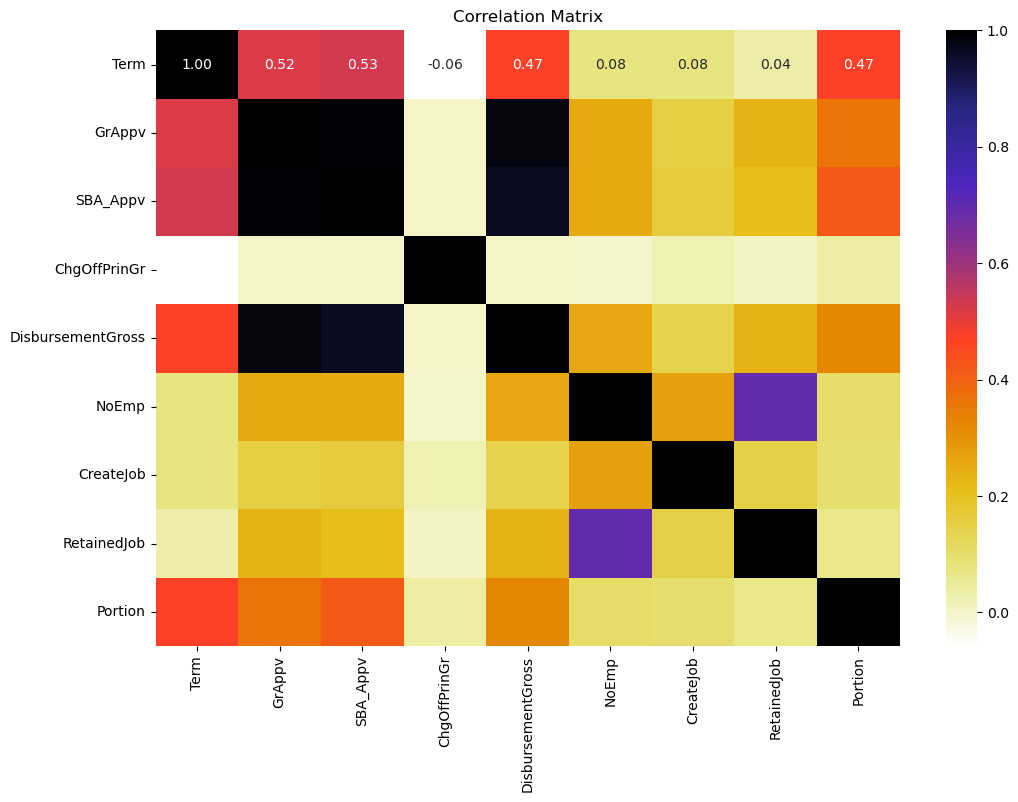

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r, fmt='.2f')
plt.title('Correlation Matrix')
# plt.savefig(f"correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

There are strong positive correlations between GrAppv and SBA_Appv, and moderate correlations between Term, DisbursementGross, and Portion. Other variables show weak or no significant correlations.

In [39]:
def separate_highly_correlated_features(df, threshold=0.8):
    
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Mask the diagonal to avoid self-correlation
    corr_matrix.values[range(len(corr_matrix)), range(len(corr_matrix))] = 0

    # Find feature pairs with correlation greater than the threshold
    highly_correlated_features = [
        (col1, col2) 
        for col1 in corr_matrix.columns 
        for col2 in corr_matrix.index 
        if corr_matrix.loc[col1, col2] > threshold
    ]

    # Identify features not involved in any high correlation pairs
    all_correlated_features = set([feature for pair in highly_correlated_features for feature in pair])
    uncorrelated_features = [feature for feature in df.columns if feature not in all_correlated_features]

    return highly_correlated_features, uncorrelated_features

features = separate_highly_correlated_features(df_clean[numerical_features])
features

([('GrAppv', 'SBA_Appv'),
  ('GrAppv', 'DisbursementGross'),
  ('SBA_Appv', 'GrAppv'),
  ('SBA_Appv', 'DisbursementGross'),
  ('DisbursementGross', 'GrAppv'),
  ('DisbursementGross', 'SBA_Appv')],
 ['Term', 'ChgOffPrinGr', 'NoEmp', 'CreateJob', 'RetainedJob', 'Portion'])

.

Clearly 'GrAppv', 'SBA_Appv', 'DisbursementGross have high correlation and might add multicollinearity in our model, it would be wise to drop 2 out of 3 of those columns. We already have a column Portion which was derived from 'GrAppv' and 'SBA_Appv', so we can drop one of those two.',

In [40]:
columns_to_drop = ['SBA_Appv', 'DisbursementGross']
df_clean = df_clean.drop(columns=columns_to_drop)

In [41]:
# Log transform highly skewed features
log_transformed_features = ['GrAppv', 'ChgOffPrinGr']
for feature in log_transformed_features:
    df_clean[f'{feature}_log'] = np.log1p(df_clean[feature])

# Square root transform moderately skewed features
sqrt_transformed_features = ['NoEmp', 'CreateJob', 'RetainedJob']
for feature in sqrt_transformed_features:
    df_clean[f'{feature}_sqrt'] = np.sqrt(df_clean[feature])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

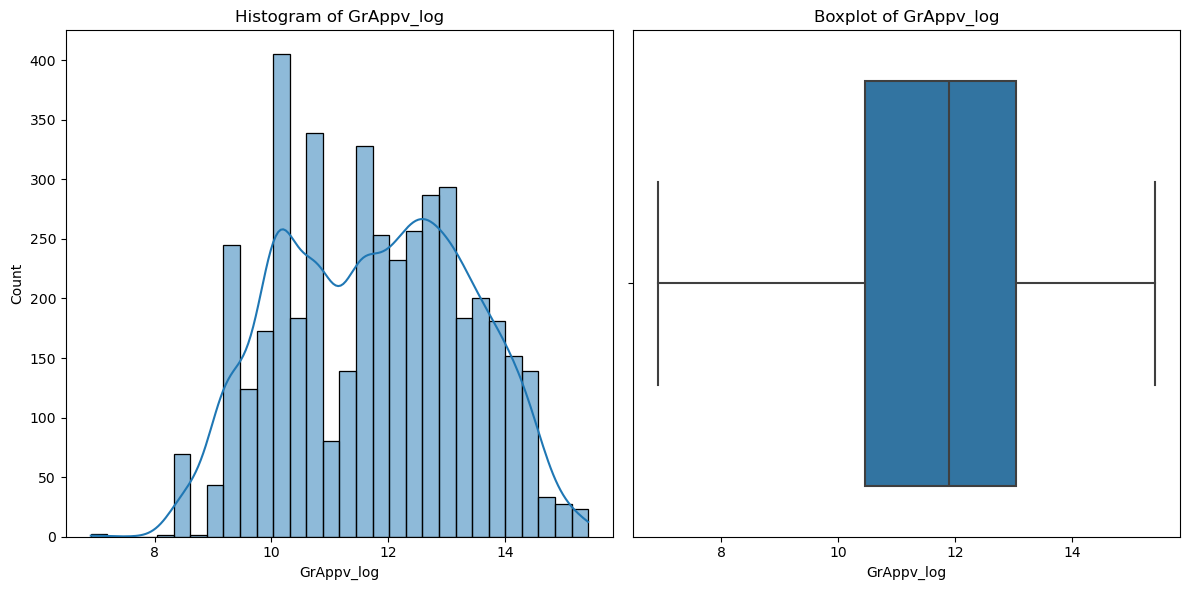

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

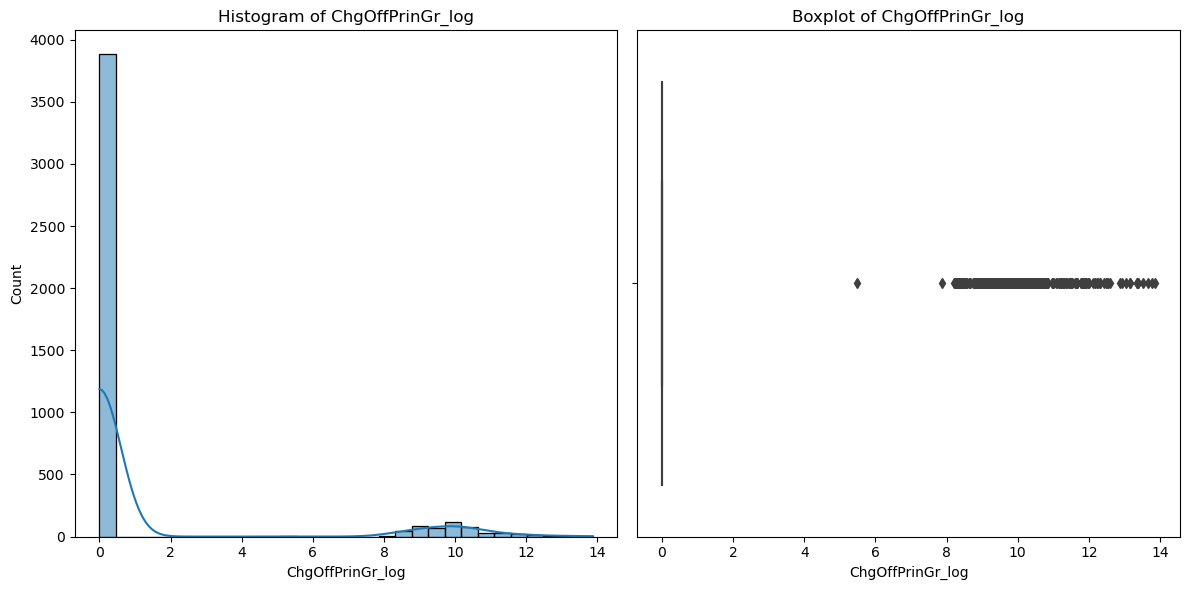

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

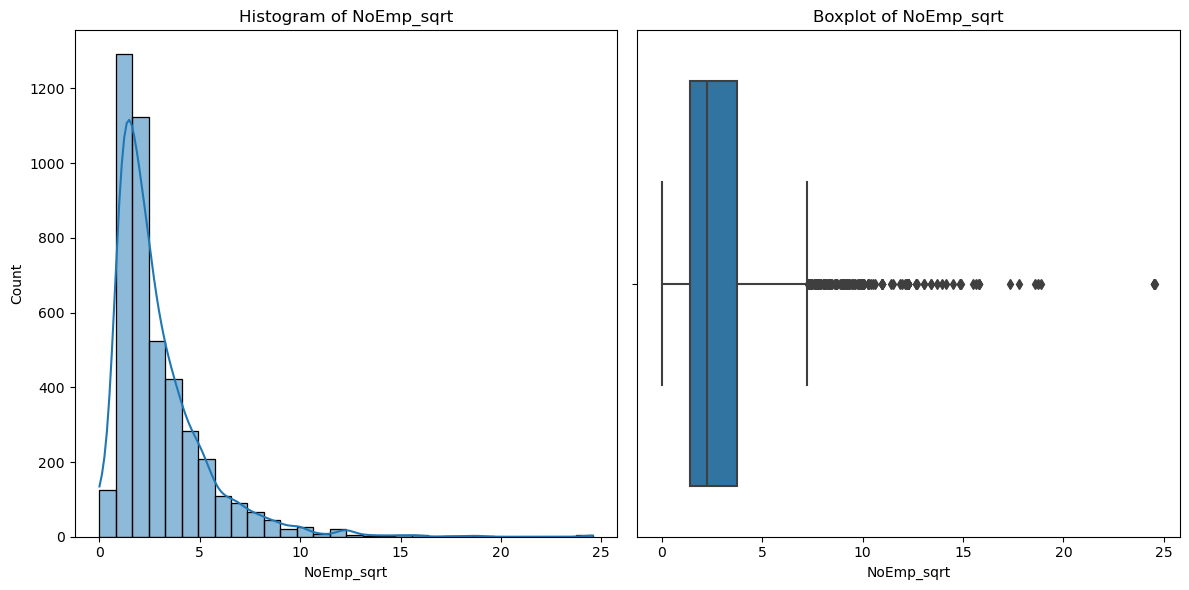

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

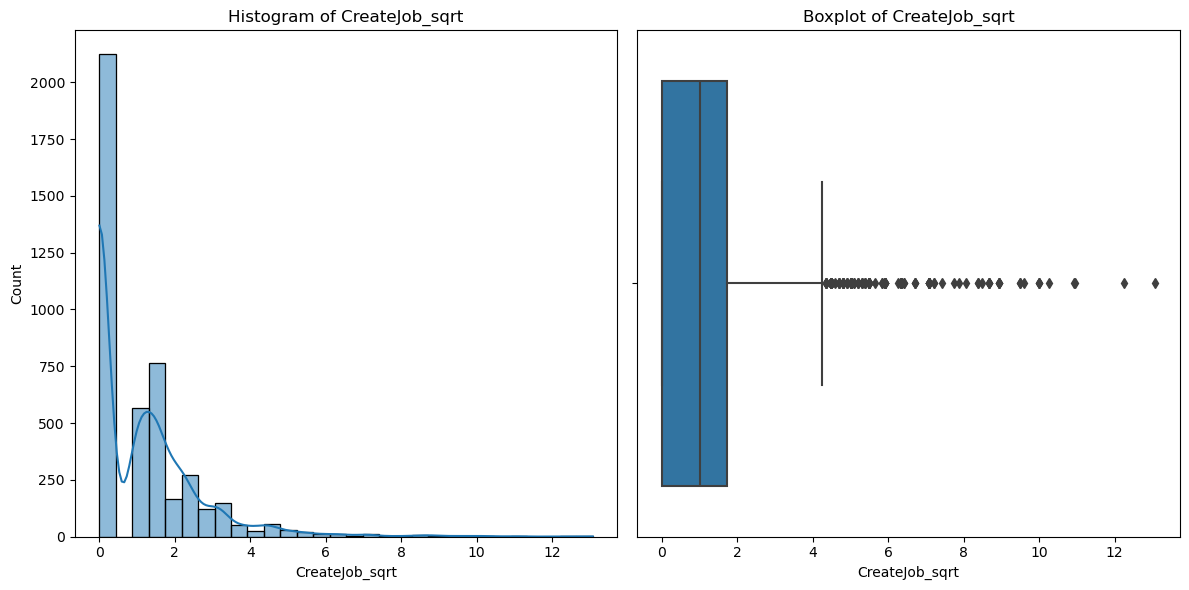

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

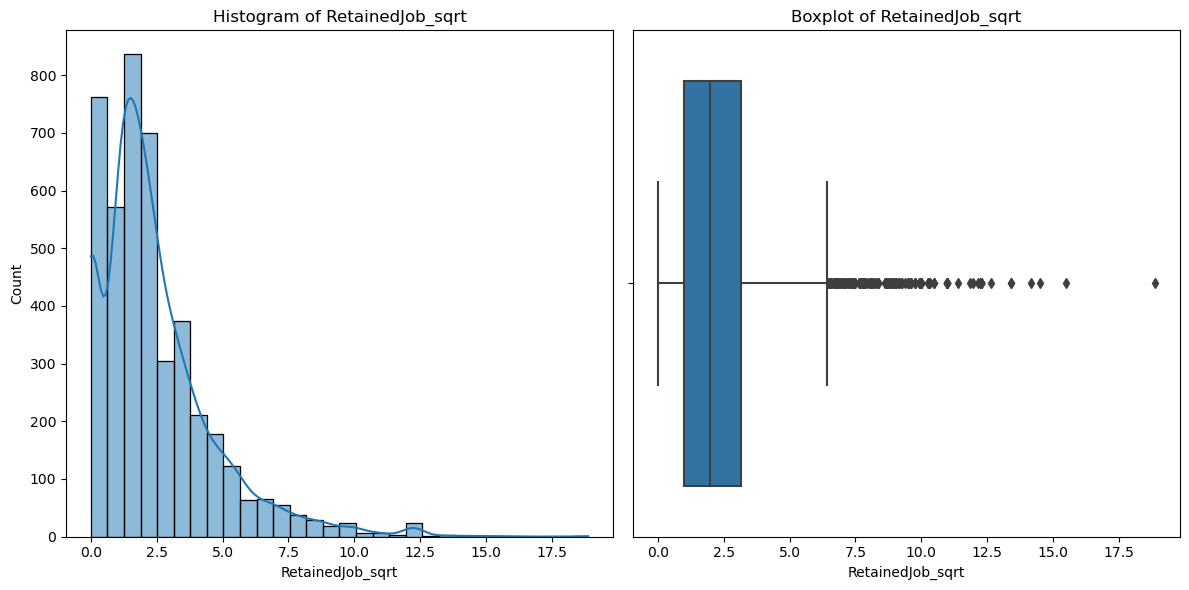

In [42]:
transformed_features = [f'{feature}_log' for feature in log_transformed_features] + \
                       [f'{feature}_sqrt' for feature in sqrt_transformed_features]

for feature in transformed_features:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[feature])
    plt.title(f"Boxplot of {feature}")

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # plt.savefig(f"{feature}_plots.png", dpi=300, bbox_inches='tight')
    plt.show()

**Skewness:** All variables except GrAppv_log show right-skewed distributions, with most data points concentrated near zero.<br>
**Outliers:** Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt have significant outliers, indicating the presence of extreme values.<br>
**Central Tendency:** The medians for Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt are close to zero, while GrAppv_log has a median around 11.<br>
**Spread:** The IQRs for Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt are small, indicating that most data points are clustered around lower values. GrAppv_log has a wider IQR, indicating more spread in the data.<br>
These observations suggest that the variables Createjob_sqrt, NoEmp_sqrt, and Retainedjob_sqrt may require transformation or normalization.

In [43]:
df_clean = df_clean.drop(columns=['GrAppv', 'ChgOffPrinGr', 'NoEmp', 'CreateJob', 'RetainedJob'])

In [44]:
numerical_features = ['Term', 'GrAppv_log', 'ChgOffPrinGr_log', 'NoEmp_sqrt', 'CreateJob_sqrt', 'RetainedJob_sqrt', 'Portion']
categorical_features = ['RevLineCr', 'MIS_Status', 'UrbanRural', 'NewExist', 'RealEstate']

## one-way ANOVA

In [45]:
from scipy.stats import f_oneway
# Function to perform ANOVA for each numerical feature vs each categorical feature
def perform_anova(df, numerical_features, categorical_features):
    results = {}
    
    for cat_feature in categorical_features:
        for num_feature in numerical_features:
            # Create groups for the ANOVA
            groups = [df[df[cat_feature] == category][num_feature].dropna() for category in df[cat_feature].unique()]
            
            # Perform one-way ANOVA
            f_stat, p_val = f_oneway(*groups)
            
            # Store the results
            results[f"{num_feature} ~ {cat_feature}"] = {'F-Statistic': f_stat, 'p-value': p_val}
    
    return pd.DataFrame(results).T

# Perform ANOVA on each combination of numerical and categorical feature
anova_results = perform_anova(df_clean, numerical_features, categorical_features)

# Filter for significant results (p-value < 0.05)
significant_results = anova_results[anova_results['p-value'] < 0.05]

# Display results
# print(anova_results)
print("\nSignificant results (p-value < 0.05):")
print(significant_results)

<IPython.core.display.Javascript object>


Significant results (p-value < 0.05):
                                 F-Statistic        p-value
Term ~ RevLineCr                 1063.757340  3.830160e-209
GrAppv_log ~ RevLineCr            652.315118  2.850541e-134
ChgOffPrinGr_log ~ RevLineCr        4.587263   3.226525e-02
NoEmp_sqrt ~ RevLineCr             62.269120   3.753978e-15
CreateJob_sqrt ~ RevLineCr         21.537346   3.571138e-06
RetainedJob_sqrt ~ RevLineCr       43.192970   5.538373e-11
Portion ~ RevLineCr              3626.872669   0.000000e+00
Term ~ MIS_Status                 190.038943   2.347746e-42
GrAppv_log ~ MIS_Status           672.093429  5.213098e-138
ChgOffPrinGr_log ~ MIS_Status  164857.684724   0.000000e+00
NoEmp_sqrt ~ MIS_Status           103.992855   3.765232e-24
RetainedJob_sqrt ~ MIS_Status      37.384000   1.054396e-09
Portion ~ MIS_Status               35.035183   3.484660e-09
Term ~ UrbanRural                  20.709425   5.489543e-06
ChgOffPrinGr_log ~ UrbanRural       5.310226   2.124704e-02
C

Extremely Strong Relationships: These are characterized by very high F-statistics (often in the thousands) and p-values that are practically zero. These indicate that the independent variable (e.g., RealEstate, RevLineCr) has a very strong influence on the dependent variable (e.g., Term, Portion), with clear and distinct differences between the groups.

Moderate but Significant Relationships: These have lower F-statistics (often in the single to low double digits) and p-values that are still below the 0.05 threshold. These indicate that the independent variable has a significant influence on the dependent variable, but the effect is not as strong. The differences between groups are still notable but less pronounced.

### One Hot encoding

The categorical features "RevLineCr," "MIS_Status," "UrbanRural," "NewExist," and "RealEstate" all have binary values. Let us use One Hot Encoding to convert them.

In [46]:
df_clean = pd.get_dummies(df_clean, columns=categorical_features, drop_first=True)

new_column_names = {
    'RevLineCr_Y': 'RevLineCr',
    'MIS_Status_P I F': 'MIS_Status',
    'UrbanRural_2': 'UrbanRural',
    'NewExist_2.0': 'NewExist',
    'RealEstate_1': 'RealEstate'
}

# Rename the columns
df_clean.rename(columns=new_column_names, inplace=True)

df_clean[categorical_features] = df_clean[categorical_features].astype(int)
df_clean.head(5)

<IPython.core.display.Javascript object>

,Term,Portion,GrAppv_log,ChgOffPrinGr_log,NoEmp_sqrt,CreateJob_sqrt,RetainedJob_sqrt,RevLineCr,MIS_Status,UrbanRural,NewExist,RealEstate
380241,300,0.9,14.098809,0.000000,2.828427,0.0,2.828427,0,1,0,0,1
380248,84,0.5,9.903538,0.000000,1.000000,1.0,1.000000,1,1,0,0,0
380325,48,0.9,9.210440,9.133783,1.732051,2.0,2.645751,1,0,0,1,0
380330,68,0.9,9.903538,9.876990,2.449490,1.0,2.645751,0,0,0,0,0
380402,120,0.9,13.130334,0.000000,6.000000,2.0,0.000000,0,1,0,0,0


# Model

## splitting data into train and test

In [47]:
X = df_clean.drop(columns=['MIS_Status'])
y = df_clean['MIS_Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you need to keep the DataFrame structure
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Now you have train_df and test_df
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set shape: (3516, 12)
Test set shape: (879, 12)


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances)

<IPython.core.display.Javascript object>

             Feature  Importance
3   ChgOffPrinGr_log    0.773756
0               Term    0.105076
2         GrAppv_log    0.068911
1            Portion    0.015296
4         NoEmp_sqrt    0.011579
6   RetainedJob_sqrt    0.006383
7          RevLineCr    0.006029
5     CreateJob_sqrt    0.005170
10        RealEstate    0.003835
9           NewExist    0.002632
8         UrbanRural    0.001332


1.	**Most Important Features:**

•	ChgOffPrinGr_log (Change-Off Principal Granted, log-transformed): 0.774

•	Significance: The most critical factor, indicating that the amount of principal forgiven or restructured significantly impacts the model's predictions.

•	Term (Loan Term): 0.105

•	Significance: The second most important feature, showing that the duration of the loan plays a substantial role in outcomes.

•	GrAppv_log (Grant Approved, log-transformed): 0.069

•	Significance: An important factor, suggesting that the size of the approved grant influences financial planning and resource allocation.

2.	**Moderately Important Features:**

•	Portion: 0.015

•	Significance: Represents a share or percentage, affecting fund distribution and investments.

•	NoEmp_sqrt (Number of Employees, square root-transformed): 0.012

•	Significance: Employment levels, adjusted for scale, impact workforce management.

•	RetainedJob_sqrt (Retained Jobs, square root-transformed): 0.0064

•	Significance: Job retention, adjusted for scale, affects employment stability.

•	RevLineCr (Revenue Line of Credit): 0.0060

•	Significance: Influences financial health and operational capabilities.

•	CreateJob_sqrt (Created Jobs, square root-transformed): 0.0052

•	Significance: Job creation, adjusted for scale, influences workforce expansion.


3.	**Less Important Features:**

•	RealEstate: 0.0038

•	Significance: Real estate involvement affects financial decisions and operational strategies.

•	NewExist (New vs. Existing Businesses): 0.0026

•	Significance: The stage of the business affects financial decisions and operational strategies.

•	UrbanRural: 0.0013

•	Significance: Gographic context influences regional strategies.
graphic context influences regional strategies.

s regional strategies.

nancial decisions and operational strategies.
nancial decisions and operational strategies.
isions and operational strategies.
sions and operational strategies.

In [49]:
df_clean = df_clean.drop(columns=['UrbanRural', 'NewExist'])

In [50]:
X = df_clean.drop(columns=['MIS_Status'])
y = df_clean['MIS_Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you need to keep the DataFrame structure
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Now you have train_df and test_df
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set shape: (3516, 10)
Test set shape: (879, 10)


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

## Logistic Regression

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

<IPython.core.display.Javascript object>

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00       774

    accuracy                           1.00       879
   macro avg       0.99      1.00      0.99       879
weighted avg       1.00      1.00      1.00       879



logistic regression model indicates excellent performance across all key metrics

The logistic regression model demonstrates exceptional performance after dropping the UrbanRural and NewExist features. The high precision, recall, and F1-scores for both classes indicate that the model is highly effective in classifying instances accurately. This suggests that the retained features are sufficient for making accurate predictions, and the model is well-optimized.

## Confusion Matrix

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[105   0]
 [  2 772]]


True Positives (TP): 772
These are the cases where the actual class is positive (1), and the model correctly predicted it as positive.<br>
True Negatives (TN): 105
These are the cases where the actual class is negative (0), and the model correctly predicted it as negative.<br>
False Positives (FP): 0
These are the cases where the actual class is negative (0), but the model incorrectly predicted it as positive. In this case, there are no false positives.<br>
False Negatives (FN): 2
These are the cases where the actual class is positive (1), but the model incorrectly predicted it as neative.
ative.


## Random Forest Classifier

In [54]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00       774

    accuracy                           1.00       879
   macro avg       0.99      1.00      0.99       879
weighted avg       1.00      1.00      1.00       879



The Random Forest model demonstrates exceptional performance after dropping the UrbanRural and NewExist features. The high precision, recall, and F1-scores for both classes indicate that the model is highly effective in classifying instances accurately. This suggests that the retained features are sufficient for making accurate predictions, and the model is well-optimized.

## Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define your model
model = RandomForestClassifier(random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # cv=5 indicates 5-fold cross-validation

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.99573864 1.         0.99857752 1.         0.99857752]
Average Cross-Validation Score: 0.998578737230053


The cross-validation results indicate that the model is performing exceptionally well, with an average accuracy of approximately 99.86%. This high and consistent performance across multiple folds suggests that the model is robust, reliable, and not overfitting to the training data. The retained features are sufficient for making accurate predictions, and the model is well-optimized.

## Grid Search

In [56]:
# Specify the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.998578737230053


The grid search results indicate that the Random Forest model is performing exceptionally well with the best parameters found. The high and consistent cross-validation score of approximately 99.86% suggests that the model is robust, reliable, and not overfitting to the training data. The retained features are sufficient for making accurate predictions, and the model is well-optimized.

In [57]:
# Use the best model from grid search/random search
best_model = grid_search.best_estimator_  

# Evaluate on test set
y_pred_test = best_model.predict(X_test_scaled)

# Classification report for test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00       774

    accuracy                           1.00       879
   macro avg       0.99      1.00      0.99       879
weighted avg       1.00      1.00      1.00       879



## Naive Bayes Classifier

In [76]:
from sklearn.naive_bayes import GaussianNB
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00       774

    accuracy                           1.00       879
   macro avg       0.99      1.00      0.99       879
weighted avg       1.00      1.00      1.00       879



## XGBoost Classifier

In [78]:
from xgboost import XGBClassifier
# Train the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00       774

    accuracy                           1.00       879
   macro avg       0.99      1.00      0.99       879
weighted avg       1.00      1.00      1.00       879



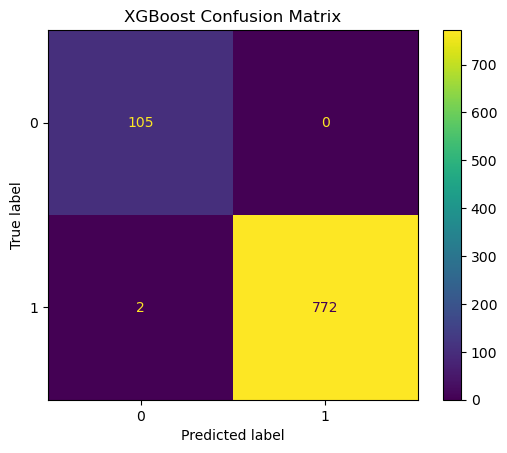

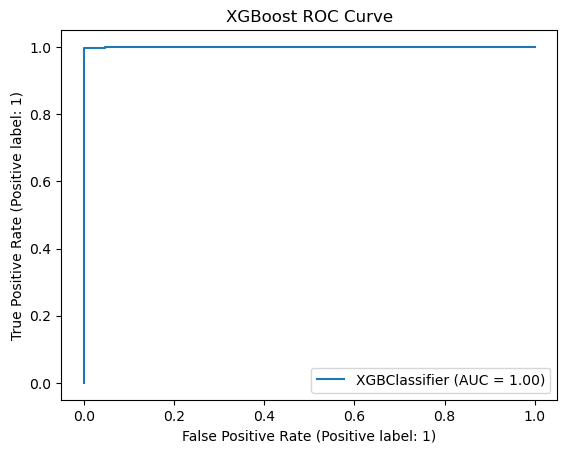

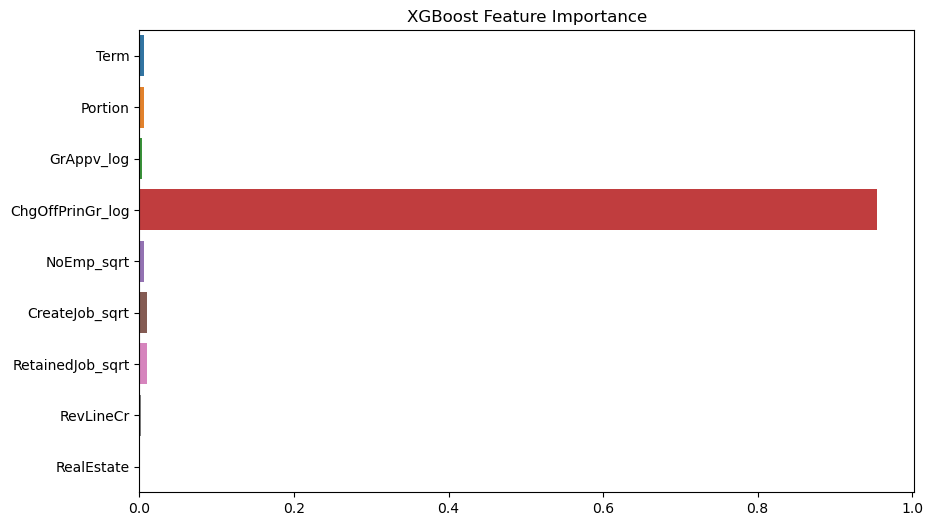

In [105]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_classifier, X_test, y_test)
plt.title('XGBoost Confusion Matrix')
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(xgb_classifier, X_test, y_test)
plt.title('XGBoost ROC Curve')
plt.savefig("roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_classifier.feature_importances_, y=X.columns)
plt.title('XGBoost Feature Importance')
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

Model Performance: The XGBoost classifier demonstrates excellent performance with an AUC of 1.00, indicating perfect classification.<br>
Feature Importance: The feature "ChgOffPrinGr_log" is the most critical feature for the model's predictions<br>.
Classification Accuracy: The confusion matrix shows that the model has very high accuracy with minimal misclassifications.

## Catboost Classifier

In [101]:
from catboost import CatBoostClassifier
# Train the CatBoost classifier
catboost_classifier = CatBoostClassifier(verbose=0)
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_classifier.predict(X_test)
y_proba = catboost_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      1.00      1.00       774

    accuracy                           1.00       879
   macro avg       0.99      1.00      0.99       879
weighted avg       1.00      1.00      1.00       879



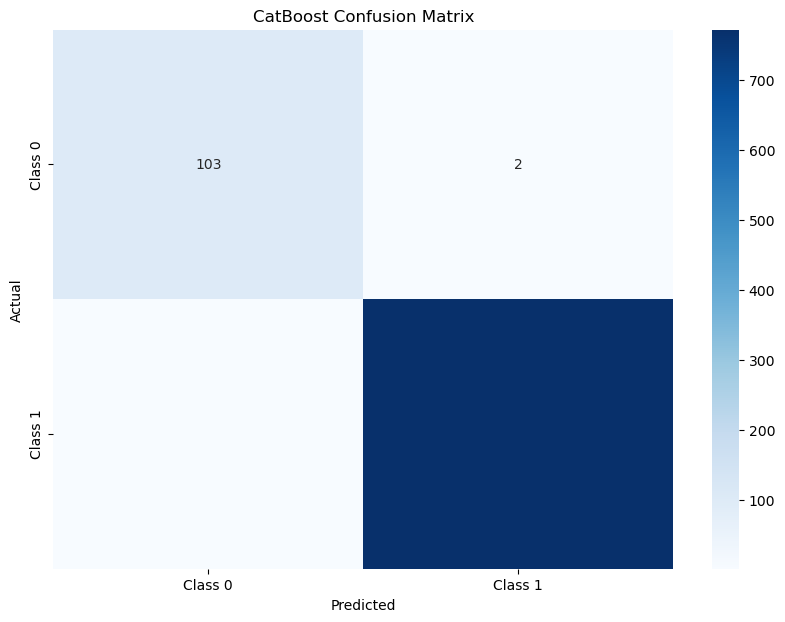

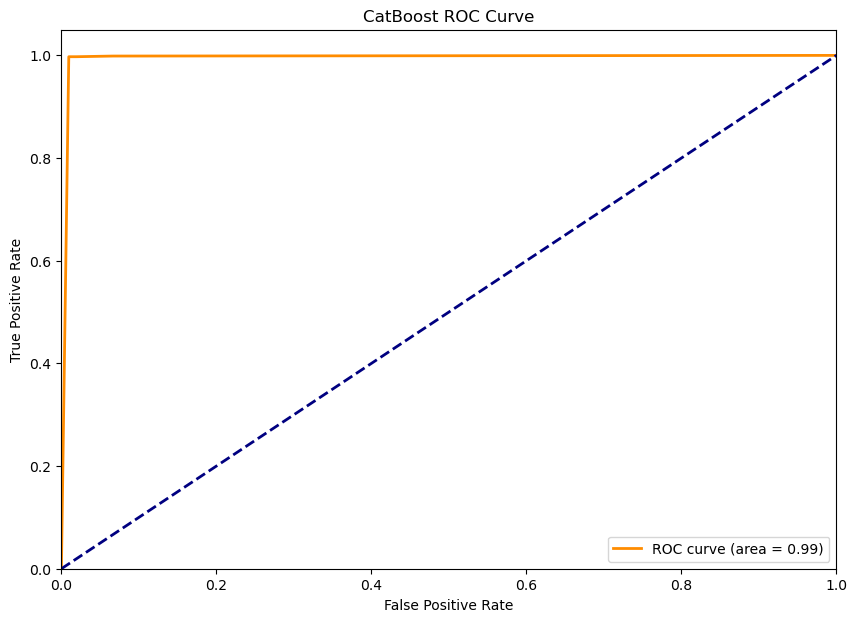

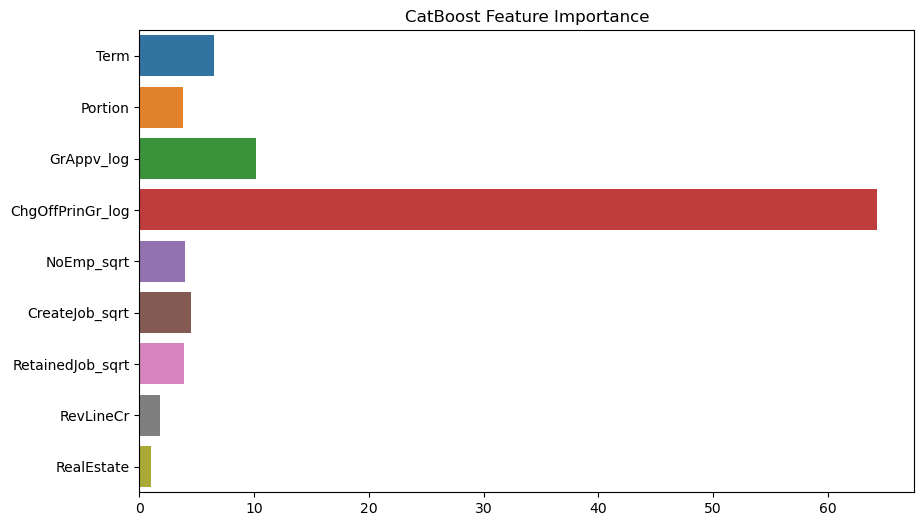

In [106]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.savefig("catboost_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(loc="lower right")
plt.savefig("catboost_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=catboost_classifier.feature_importances_, y=X.columns)
plt.title('CatBoost Feature Importance')
plt.savefig("catboost_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

ROC Curve:
The first image shows the Receiver Operating Characteristic (ROC) curve for the CatBoost model. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The area under the ROC curve (AUC) is 0.99, indicating that the model has excellent discriminative ability between the positive and negative classes. An AUC of 1.0 represents a perfect model, while an AUC of 0.5 represents a model with no discriminative ability.

Confusion Matrix:
The second image is a confusion matrix, which provides a summary of the model's performance in terms of true positives, true negatives, false positives, and false negatives.

The confusion matrix indicates that the model has a high number of true negatives and true positives, with very few false positives and false negatives, suggesting good overall performance.

## KNN Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier
# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
y_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       105
           1       1.00      1.00      1.00       774

    accuracy                           1.00       879
   macro avg       0.99      0.99      0.99       879
weighted avg       1.00      1.00      1.00       879



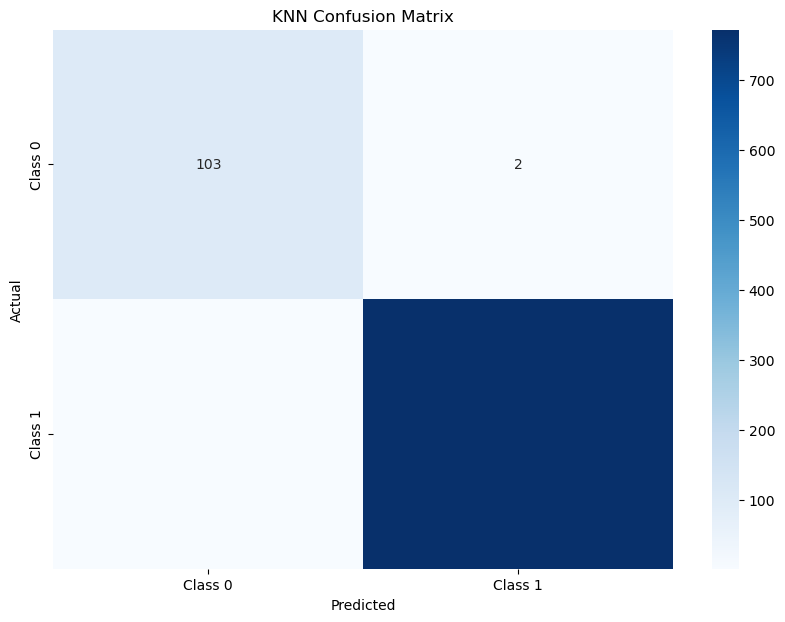

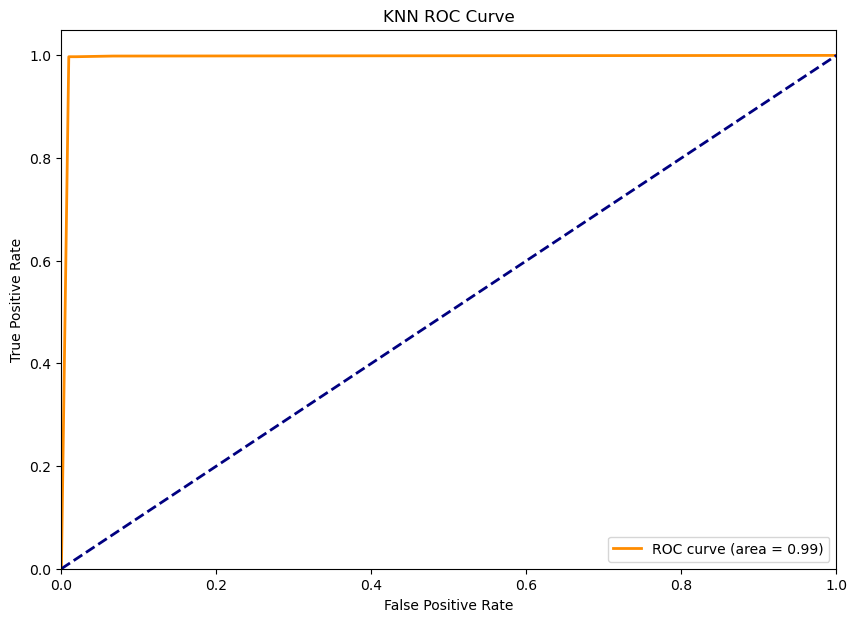

In [107]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.savefig("knn_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.savefig("knn_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

The KNN classifier has a very high AUC of 0.99, indicating excellent performance.
The confusion matrix shows that the classifier has a high true positive rate and a low false positive rate, with very few misclassifications.

In [58]:
import pickle

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [59]:
filename = 'model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

## Function to predict loan approval

In [61]:
def predict_loan_approval(model, input_data):
    # Define the columns based on your feature names
    columns = ['Term', 'Portion', 'GrAppv_log', 'ChgOffPrinGr_log', 'NoEmp_sqrt', 'CreateJob_sqrt', 'RetainedJob_sqrt', 'RevLineCr', 'RealEstate']

    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data], columns=columns)

    # Make a prediction using the model
    prediction = model.predict(input_df)

    # Return the loan status based on the prediction
    if prediction == 1:
        return "Loan Approved"
    else:
        return "Loan Not Approved"

# Example input data
input_data = {
    'Term': 36,                  # Loan Term in months
    'Portion': 0.5,              # Example value for Portion
    'GrAppv_log': 11.4006,       # Log of Grant Approved Amount (log(90000))
    'ChgOffPrinGr_log': 12.0,    # Log of Charged Off Principal
    'NoEmp_sqrt': 4,             # Square Root of Number of Employees
    'CreateJob_sqrt': 3,         # Square Root of Jobs Created
    'RetainedJob_sqrt': 2,       # Square Root of Jobs Retained
    'RevLineCr': 1,              # Revenue Line Credit
    'RealEstate': 1              # Real Estate involvement (example value)
}

# Assuming 'model' is your trained Random Forest model
loan_status = predict_loan_approval(model, input_data)
print(loan_status)

<IPython.core.display.Javascript object>

Loan Not Approved


In [74]:
# Further adjusted input data for probable loan approval
input_data_further_adjusted = {
    'Term': 12,                   # Further reduced Loan Term in months
    'Portion': 0.7,               # Further adjusted example value for Portion
    'GrAppv_log': 14.0,           # Further increased Log of Grant Approved Amount
    'ChgOffPrinGr_log': 1.0,     # Further decreased Log of Charged Off Principal
    'NoEmp_sqrt': 7.0,           # Further increased Square Root of Number of Employees
    'CreateJob_sqrt': 6.0,        # Further increased Square Root of Jobs Created
    'RetainedJob_sqrt': 5.0,      # Further increased Square Root of Jobs Retained
    'RevLineCr': 4.0,             # Further increased Revenue Line Credit
    'RealEstate': 1               # Real Estate involvement (example value)
}

# Predict loan approval with further adjusted input data
loan_status_further_adjusted = predict_loan_approval(model, input_data_further_adjusted)
print(loan_status_further_adjusted)

<IPython.core.display.Javascript object>

Loan Approved
